# Building a dataset
...of roll damping data to be used for machine learning

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\python35-32\lib\site-packages\matplotlib\style\core.py:167: UserWarning: In C:\Users\maa\.matplotlib\stylelib\paper.mplstyle: Duplicate key in file "C:\Users\maa\.matplotlib\stylelib\paper.mplstyle", line #461
  styles = read_style_directory(stylelib_path)
c:\python35-32\lib\site-packages\matplotlib\style\core.py:167: UserWarning: In C:\Users\maa\.matplotlib\stylelib\paper.mplstyle: Duplicate key in file "C:\Users\maa\.matplotlib\stylelib\paper.mplstyle", line #462
  styles = read_style_directory(stylelib_path)


In [2]:
def get_rolldampings(inputs,url = r'http://marale.pythonanywhere.com/api/roll_damping'):


    input_list = [record for record in inputs.to_dict('records')]
    response = requests.post(url=url,
                             json=input_list)

    outputs = response.json()
    outputs
    result = pd.DataFrame(outputs)
    return result

In [3]:
N=1000
inputs = pd.DataFrame()
g = 9.81

lpp_limits = (50.0, 500.0)      # [m]
b_div_lpp_limits = (0.01, 0.1)  # [-]
fn_limits = (0.0,0.25)
phi_a_limits = np.deg2rad([0.5,10])

np.random.seed()
inputs['lpp']=lpp_limits[0] + np.diff(lpp_limits)*np.random.rand(N)
b_div_lpp = b_div_lpp_limits[0] + np.diff(b_div_lpp_limits)*np.random.rand(N)
inputs['beam']=b_div_lpp*inputs['lpp']
fn = fn_limits[0] + np.diff(fn_limits)*np.random.rand(N)
inputs['V']=fn*np.sqrt(inputs['lpp']*g)
inputs['phi_a']=phi_a_limits[0] + np.diff(phi_a_limits)*np.random.rand(N)


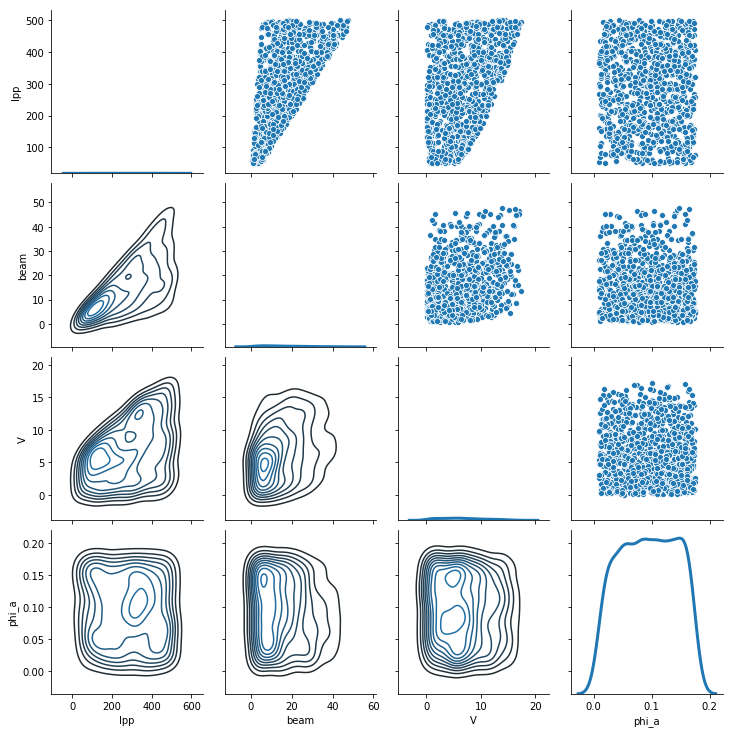

In [4]:
g = sns.PairGrid(inputs)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [5]:
limits_kawahara = {
    'CB'    : (0.5,0.85),
    r'B/d'  : (2.5,4.5),
    r'OG/d' : (-1.5,0.2),
    'CMID'    : (0.9,0.99),
    r'bBk/B': (0.01, 0.06),
    r'lBk/LPP': (0.05, 0.4),
    'OMEGA_hat': (0,1.0)
}  # Input limits for damping according to the original paper ny Kawahara

In [6]:
def random(N,limits):
    
    df = pd.DataFrame()
    for key,lims in limits.items():
        df[key]=lims[0] + np.diff(lims)*np.random.rand(N)
    
    return df

In [7]:
df_nondim = random(N=N, limits = limits_kawahara)

In [8]:
inputs['T']=inputs['beam']/df_nondim[r'B/d']
inputs['BK_L']=inputs['lpp']*df_nondim[r'lBk/LPP']
inputs['BK_B']=inputs['beam']*df_nondim[r'bBk/B']
inputs['OG']=inputs['T']*df_nondim[r'OG/d']
inputs['omega0_hat']=df_nondim['OMEGA_hat']
inputs['C_b']=df_nondim['CB']
inputs['A_0']=df_nondim['CMID']

In [9]:
inputs.head()

,lpp,beam,V,phi_a,T,BK_L,BK_B,OG,omega0_hat,C_b,A_0
0,494.479989,45.083554,9.639098,0.027372,10.918161,40.967858,2.681951,-8.938813,0.845727,0.683246,0.921088
1,469.045490,20.818856,4.095801,0.097076,7.859813,128.714619,0.334657,-4.904467,0.386049,0.640118,0.934323
2,220.525777,8.359226,0.946490,0.125246,2.198607,79.790668,0.299437,0.235914,0.303229,0.595432,0.913456
3,187.720487,18.314681,4.651168,0.025071,4.212827,61.677000,0.343290,-5.411772,0.693370,0.545411,0.971346
4,204.542674,3.759762,3.993861,0.077042,1.071123,45.903318,0.201950,-0.334912,0.340010,0.743520,0.938814


In [10]:
result = get_rolldampings(inputs=inputs)

In [17]:
data = inputs.copy()
damping = result['B_e_hat']  # Introduce some noise here?
data['damping'] = damping

# Saving

In [12]:
data.to_csv('../data/roll_damping_data.csv', sep=';')

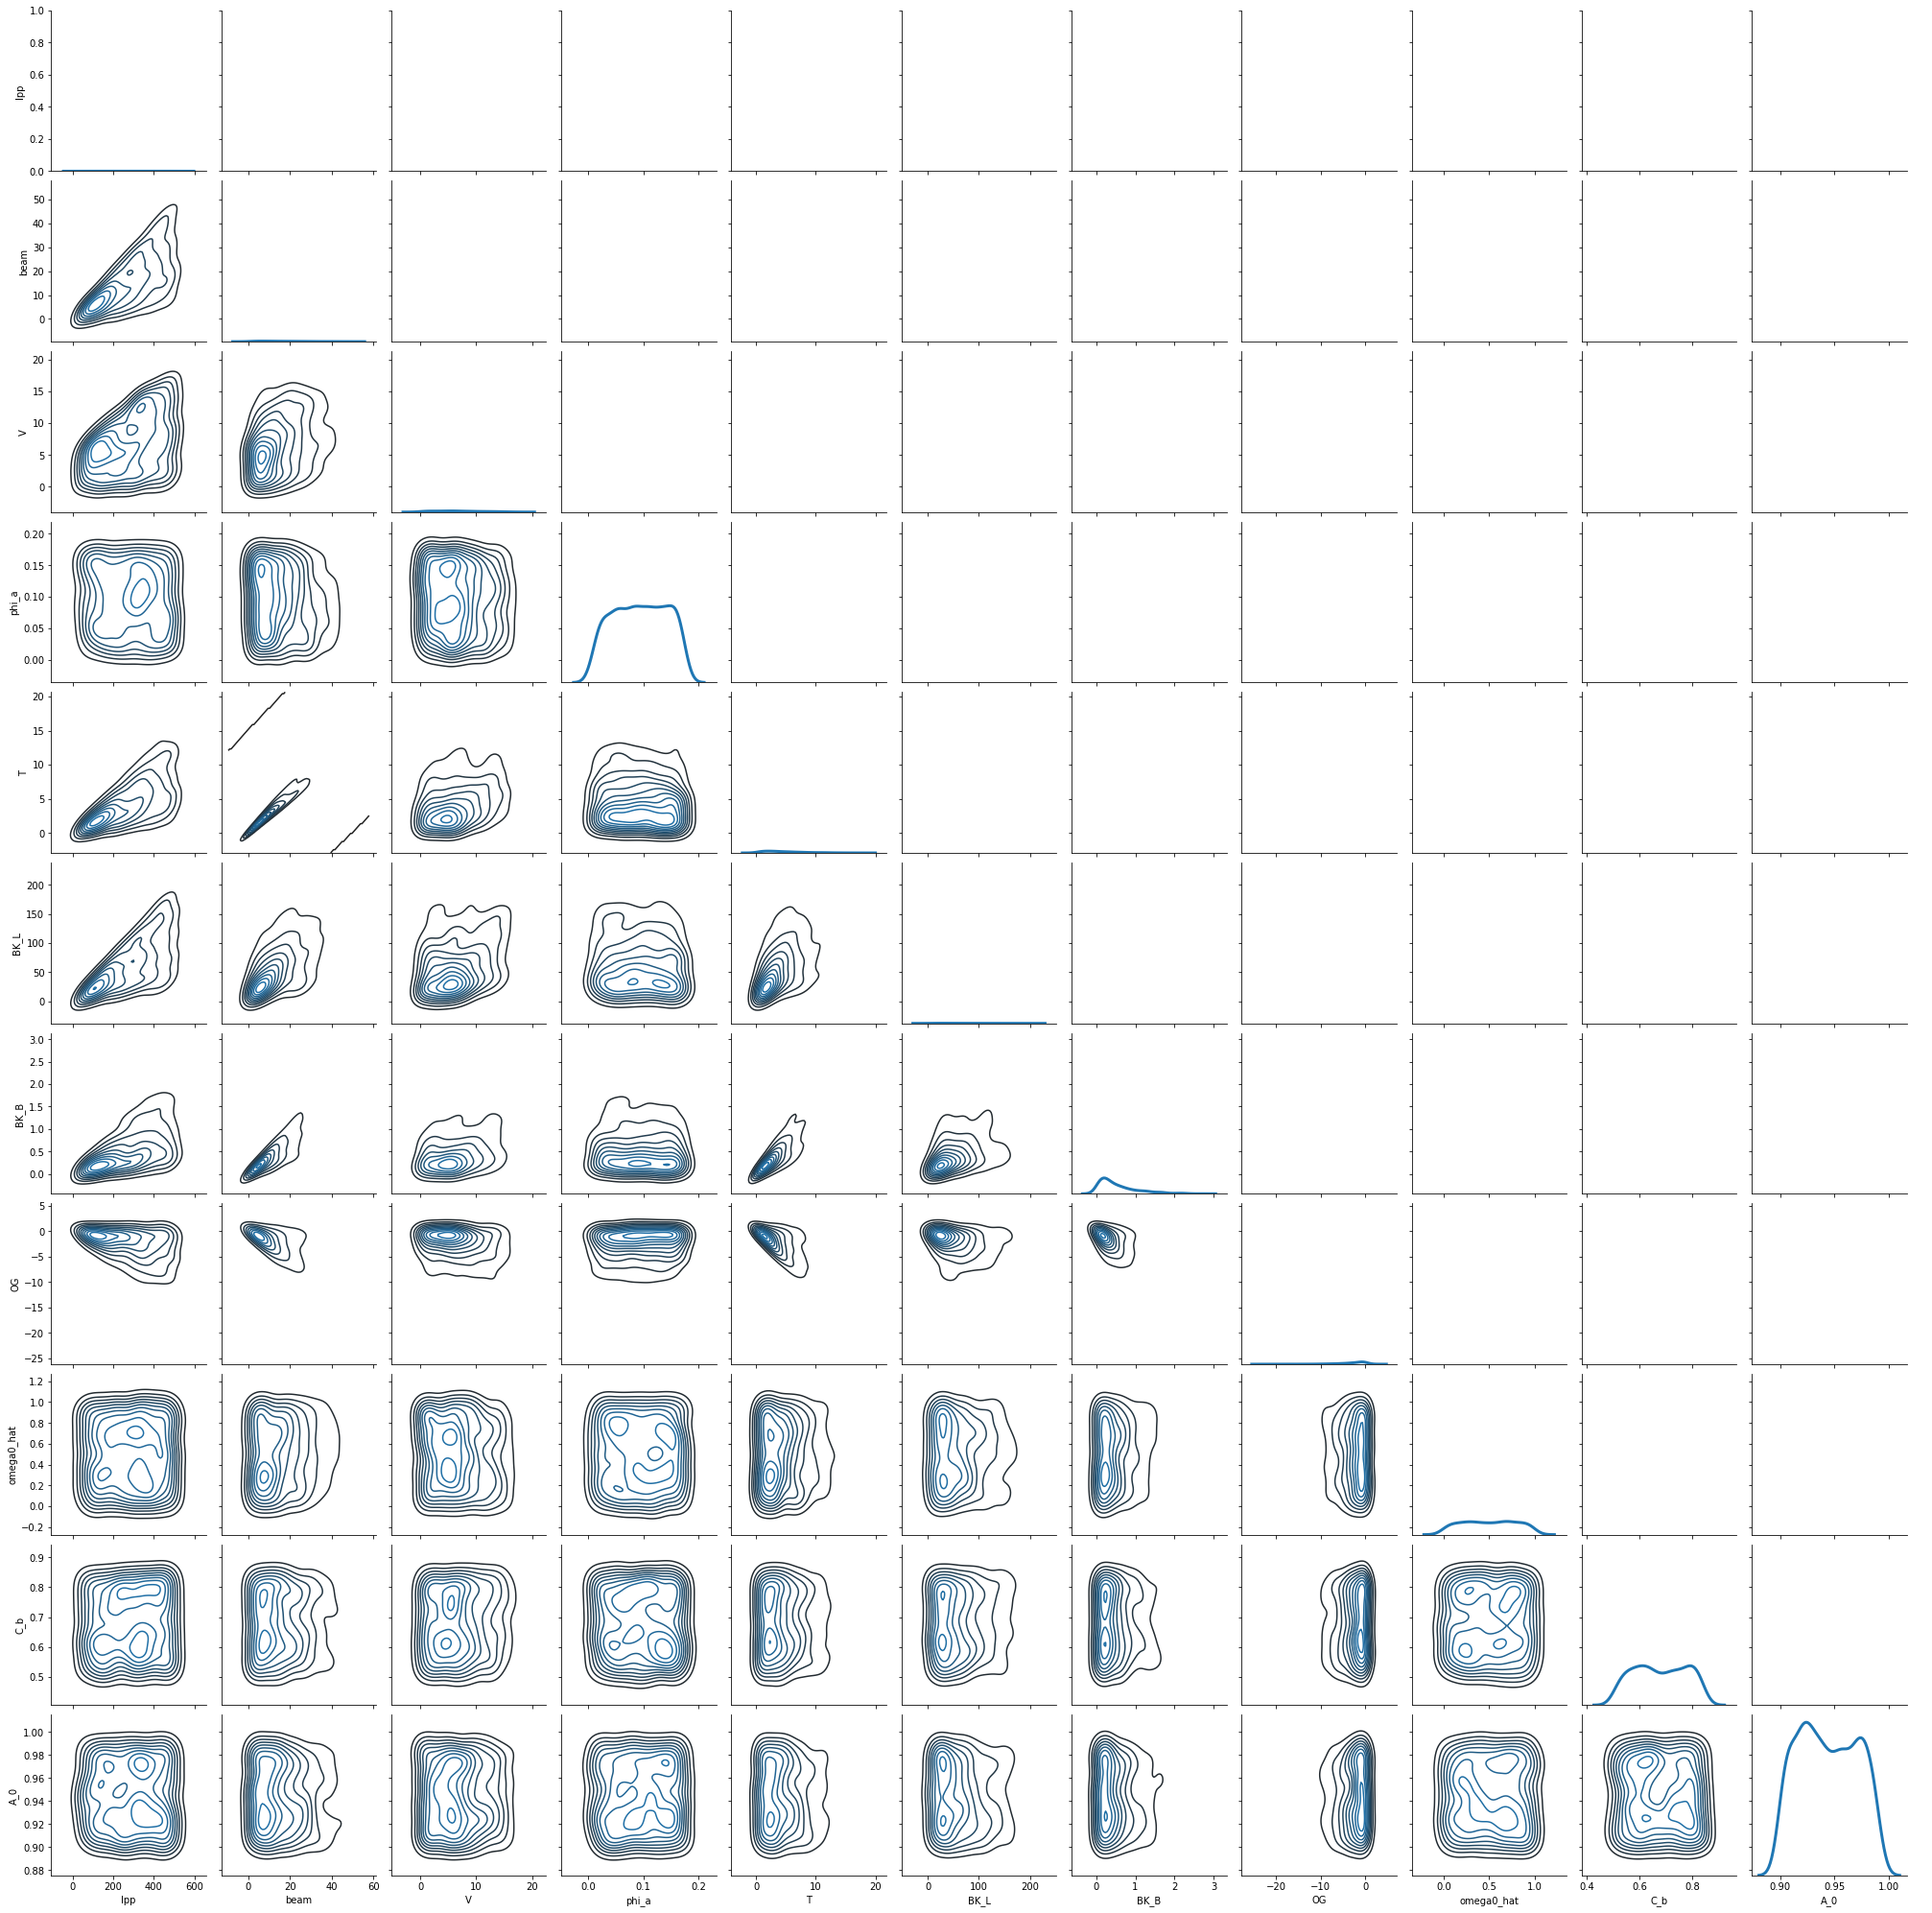

In [14]:
g = sns.PairGrid(inputs)
#g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);